## Reproduction of Figure 5

This notebook reproduces the values in Figure 5. (predictive factor for successful bug reproduction)

In [1]:
import sys
sys.path.append("../../scripts/")
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

warnings.simplefilter(action='ignore', category=FutureWarning)

RANKING_RESULT_PATH_D4J = '../../results/ranking_features_d4j.csv'
RANKING_RESULT_PATH_GHRB = '../../results/ranking_features_ghrb.csv'
GEN_TEST_PATH_D4J = '../../data/Defects4J/gen_tests/'
GEN_TEST_PATH_GHRB = '../../data/Defects4J/gen_tests/'

In [2]:
with open(RANKING_RESULT_PATH_D4J) as f:
    rank_feature_df = pd.read_csv(f)

with open(RANKING_RESULT_PATH_GHRB) as f:
    rank_feature_df_ghrb = pd.read_csv(f)

(1) The maximum output cluster size distribution in Defects4J

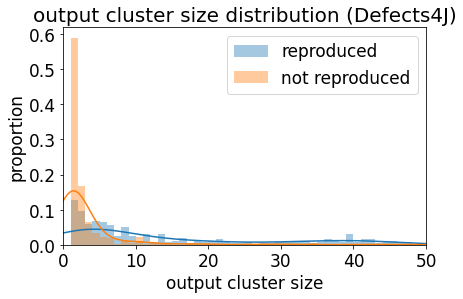

In [3]:
rdf = rank_feature_df.groupby('bug_id').max().reset_index()
rdf['has_success'] = rdf['success'].apply(lambda x: x > 0)
rdf['output cluster size'] = rdf['clus_size_output_fib'].apply(lambda x: x)

fig_name = 'output cluster size distribution (Defects4J)'
plt.figure(figsize=(6.5,4))
df = rdf[rdf.has_success]
sns.distplot(df['output cluster size'], kde=True, bins=range(0, 51), label="reproduced")
df = rdf[~rdf.has_success]
sns.distplot(df['output cluster size'], kde=True, bins=range(0, 51), label="not reproduced")
plt.legend(prop={'size': 17})
plt.title(fig_name, fontsize=20)
plt.ylabel('proportion', fontsize=17)
plt.xlabel('output cluster size', fontsize=17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.xlim(0, 50)

plt.show()

(2) The maximum output cluster size distribution in GHRB

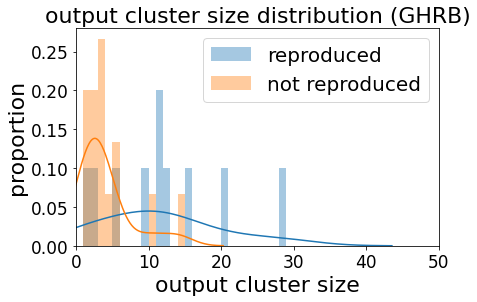

In [4]:
rdf = rank_feature_df_ghrb.groupby('bug_id').max().reset_index()
rdf['has_success'] = rdf['success'].apply(lambda x: x > 0)
rdf['output cluster size'] = rdf['clus_size_output_fib'].apply(lambda x: x)

fig_name = 'output cluster size distribution (GHRB)'
plt.figure(figsize=(6.5,4))
df = rdf[rdf.has_success]
sns.distplot(df['output cluster size'], kde=True, bins=range(0, 51), label="reproduced")
df = rdf[~rdf.has_success]
sns.distplot(df['output cluster size'], kde=True, bins=range(0, 51), label="not reproduced")
plt.legend(prop={'size': 20})
plt.title(fig_name, fontsize=22)
plt.ylabel('proportion', fontsize=22)
plt.xlabel('output cluster size', fontsize=22)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.xlim(0, 50)
plt.show()